In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import json
from collections import OrderedDict

In [2]:
'''
column = ['Date','KGD','KNR','WYD','KKD','MPM','PKD','TSR','EKM','IDK','KTM','ALP','PTA','KLM','TVM']
data = [['04/08/2020',4032,9505,2875,12500,31212,10947,11978,12457,4141,9396,6438,4588,9002,15991]]
quarantine_total = pd.DataFrame(data,columns=column)
print(quarantine_total)
quarantine_total.to_csv('data/quarantine_total.csv')
'''

"\ncolumn = ['Date','KGD','KNR','WYD','KKD','MPM','PKD','TSR','EKM','IDK','KTM','ALP','PTA','KLM','TVM']\ndata = [['04/08/2020',4032,9505,2875,12500,31212,10947,11978,12457,4141,9396,6438,4588,9002,15991]]\nquarantine_total = pd.DataFrame(data,columns=column)\nprint(quarantine_total)\nquarantine_total.to_csv('data/quarantine_total.csv')\n"

In [3]:
total_quarantine = pd.read_csv('data/quarantine/quarantine_total.csv')
del total_quarantine['Unnamed: 0']
total_quarantine

,Date,KGD,KNR,WYD,KKD,MPM,PKD,TSR,EKM,IDK,KTM,ALP,PTA,KLM,TVM
0,04/08/2020,4032,9505,2875,12500,31212,10947,11978,12457,4141,9396,6438,4588,9002,15991
1,05/08/2020,4162,9629,2857,13132,31571,10644,11790,13263,4181,9593,6648,4944,9166,16394
2,06/08/2020,4329,9721,2883,13455,31792,10939,11662,12391,4285,9043,6924,4970,8511,17134
3,07/08/2020,4422,9679,2921,13463,32500,11733,11673,12260,4116,9330,6949,5071,8023,17544
4,10/08/2020,4701,8919,2774,13784,32536,11530,10982,12336,3848,9708,7190,5028,7710,18249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,04/10/2020,4546,15811,3570,28000,44440,15197,13405,29563,11565,20571,13741,8378,19135,29785
60,05/10/2020,4588,15123,3653,28791,45047,15711,13549,29736,12066,20184,13092,8504,18176,30226
61,06/10/2020,4586,15160,3967,30206,45723,16645,13562,30767,11924,19838,13587,8557,18339,30233
62,07/10/2020,4732,15453,4058,30855,47015,17342,13756,31319,12199,19216,13392,8636,18941,30920


In [4]:
#check if there is unwanterd columns ?
print(total_quarantine.columns)
inp = input("is there any unwanted coumns ? (y/n)")
if inp == 'y':
    check = input('Is the column name is Unnamed: 0 (y/n): ')
    if check == 'y':
        del total_quarantine['Unnamed: 0']
        print('deleted')
    else :
        column_name =  input("Enter column name :")
        del total_quarantine[column_name]
    total_quarantine.to_csv('data/quarantine/quarantine_total.csv', index = True)

Index(['Date', 'KGD', 'KNR', 'WYD', 'KKD', 'MPM', 'PKD', 'TSR', 'EKM', 'IDK',
       'KTM', 'ALP', 'PTA', 'KLM', 'TVM'],
      dtype='object')
is there any unwanted coumns ? (y/n)n


In [5]:
total_quarantine

,Date,KGD,KNR,WYD,KKD,MPM,PKD,TSR,EKM,IDK,KTM,ALP,PTA,KLM,TVM
0,04/08/2020,4032,9505,2875,12500,31212,10947,11978,12457,4141,9396,6438,4588,9002,15991
1,05/08/2020,4162,9629,2857,13132,31571,10644,11790,13263,4181,9593,6648,4944,9166,16394
2,06/08/2020,4329,9721,2883,13455,31792,10939,11662,12391,4285,9043,6924,4970,8511,17134
3,07/08/2020,4422,9679,2921,13463,32500,11733,11673,12260,4116,9330,6949,5071,8023,17544
4,10/08/2020,4701,8919,2774,13784,32536,11530,10982,12336,3848,9708,7190,5028,7710,18249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,04/10/2020,4546,15811,3570,28000,44440,15197,13405,29563,11565,20571,13741,8378,19135,29785
60,05/10/2020,4588,15123,3653,28791,45047,15711,13549,29736,12066,20184,13092,8504,18176,30226
61,06/10/2020,4586,15160,3967,30206,45723,16645,13562,30767,11924,19838,13587,8557,18339,30233
62,07/10/2020,4732,15453,4058,30855,47015,17342,13756,31319,12199,19216,13392,8636,18941,30920


In [6]:
def column_str_found(df):
    for i in df.columns:
        if df.dtypes[i] == object :
            return(i)


def update_file(data,file_path):
    sample = data
    continue_ = 'n'
    continue_ = input("Do you have to update the data  : (y/n)")
    while(continue_ =='y'):
        print(" Options !!")
        print("\tAdd Column : c \n\tAdd row values : r")
        op = input("Enter your option")
        if op == 'c' :
            print("-------------------")
            print("Adding column")
            print("-------------------")
            column_name = input("Enter Column name : ")
            column_length = len(sample)
            print("Enter your entries {0} :".format("must be length of  "),len(sample))
            column = []
            for i in range(column_length):
                value = input()
                column.append(value)
            sample[column_name] = np.array(column)
            print(sample)
            save = input("Do you want to save changes (y/n): ")
            if save == 'y' : 
                data = sample
            continue_ = input("do you want to add more : (y/n)")
        if op == 'r' :
            print("-------------------")
            print("Adding row values")
            print("-------------------")
            row = {}
            d=[]
            i=0
            #finding the str type columns
            col = column_str_found(sample)
            for key in sample.columns:
                if key == col :
                    value = input("Enter {0} ".format(key))
                else :
                    value = int(input("Enter {0} ".format(key)))
                row.update({key:value})
                i = i+1
            d.append(row)    
            sample = sample.append(d,True)
            print(sample)
            save = input("Do you want to save these changes (y/n): ")
            if save == 'y' : 
                data = sample
                print(data)
        continue_ = input("do you want to add more : (y/n)")

    print("Final : ")
    print(data)
    final_save = input("Do you want to overwrite quarantine_total.csv : (y/n) ")
    if final_save == 'y':
        data.to_csv(file_path, index = True)
        print("Successully saved data")

In [7]:
update_file(total_quarantine,'data/quarantine/quarantine_total.csv')

Do you have to update the data  : (y/n)y
 Options !!
	Add Column : c 
	Add row values : r
Enter your optionr
-------------------
Adding row values
-------------------
Enter Date 09/10/2020
Enter KGD 5294
Enter KNR 15592
Enter WYD 4129
Enter KKD 31817
Enter MPM 48488
Enter PKD 18527
Enter TSR 14506
Enter EKM 32594
Enter IDK 12576
Enter KTM 17616
Enter ALP 13741
Enter PTA 8737
Enter KLM 19123
Enter TVM 30946
          Date   KGD    KNR   WYD    KKD    MPM    PKD    TSR    EKM    IDK  \
0   04/08/2020  4032   9505  2875  12500  31212  10947  11978  12457   4141   
1   05/08/2020  4162   9629  2857  13132  31571  10644  11790  13263   4181   
2   06/08/2020  4329   9721  2883  13455  31792  10939  11662  12391   4285   
3   07/08/2020  4422   9679  2921  13463  32500  11733  11673  12260   4116   
4   10/08/2020  4701   8919  2774  13784  32536  11530  10982  12336   3848   
..         ...   ...    ...   ...    ...    ...    ...    ...    ...    ...   
60  05/10/2020  4588  15123  3653  28

Do you want to save these changes (y/n): y
          Date   KGD    KNR   WYD    KKD    MPM    PKD    TSR    EKM    IDK  \
0   04/08/2020  4032   9505  2875  12500  31212  10947  11978  12457   4141   
1   05/08/2020  4162   9629  2857  13132  31571  10644  11790  13263   4181   
2   06/08/2020  4329   9721  2883  13455  31792  10939  11662  12391   4285   
3   07/08/2020  4422   9679  2921  13463  32500  11733  11673  12260   4116   
4   10/08/2020  4701   8919  2774  13784  32536  11530  10982  12336   3848   
..         ...   ...    ...   ...    ...    ...    ...    ...    ...    ...   
62  07/10/2020  4732  15453  4058  30855  47015  17342  13756  31319  12199   
63  08/10/2020  5358  15404  4044  31381  47204  18242  14279  32036  12672   
64  09/10/2020  5294  15592  4129  31817  48488  18527  14506  32594  12576   
65  10/10/2020  5372  16464  4318  32081  50848  18634  14586  33106  12743   
66  11/10/2020  5330  16460  4577  32666  52847  18055  14876  33470  12989   

      KT

In [8]:
date = input('Enter date (dd-mm-yy) :')

Enter date (dd-mm-yy) :12-10-2020


In [9]:
total_quarantine = pd.read_csv('data/quarantine/quarantine_total.csv')
del total_quarantine['Unnamed: 0']
total_quarantine

,Date,KGD,KNR,WYD,KKD,MPM,PKD,TSR,EKM,IDK,KTM,ALP,PTA,KLM,TVM
0,04/08/2020,4032,9505,2875,12500,31212,10947,11978,12457,4141,9396,6438,4588,9002,15991
1,05/08/2020,4162,9629,2857,13132,31571,10644,11790,13263,4181,9593,6648,4944,9166,16394
2,06/08/2020,4329,9721,2883,13455,31792,10939,11662,12391,4285,9043,6924,4970,8511,17134
3,07/08/2020,4422,9679,2921,13463,32500,11733,11673,12260,4116,9330,6949,5071,8023,17544
4,10/08/2020,4701,8919,2774,13784,32536,11530,10982,12336,3848,9708,7190,5028,7710,18249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,08/10/2020,5358,15404,4044,31381,47204,18242,14279,32036,12672,18343,13680,8698,18998,31100
64,09/10/2020,5294,15592,4129,31817,48488,18527,14506,32594,12576,17616,13741,8737,19123,30946
65,10/10/2020,5372,16464,4318,32081,50848,18634,14586,33106,12743,18353,14320,8807,19245,31510
66,11/10/2020,5330,16460,4577,32666,52847,18055,14876,33470,12989,17828,14782,8835,20430,31779


In [10]:
list(total_quarantine.columns[1:])

['KGD',
 'KNR',
 'WYD',
 'KKD',
 'MPM',
 'PKD',
 'TSR',
 'EKM',
 'IDK',
 'KTM',
 'ALP',
 'PTA',
 'KLM',
 'TVM']

In [11]:
fieldnames = ('Date', 'KGD', 'KNR', 'WYD', 'KKD', 'MPM', 'PKD', 'TSR', 'EKM', 'IDK',
       'KTM', 'ALP', 'PTA', 'KLM', 'TVM')

entries = []
#the with statement is better since it handles closing your file properly after usage.
with open('data/quarantine/quarantine_total.csv', 'r') as csvfile:
    #python's standard dict is not guaranteeing any order, 
    #but if you write into an OrderedDict, order of write operations will be kept in output.
    reader = csv.DictReader(csvfile, fieldnames)
    for row in reader:
        entry = OrderedDict()
        for field in fieldnames:
            entry[field] = row[field]
        entries.append(entry)

output = {
    "Data_quarantine_total": entries
}

with open('data/quarantine/quarantine_total.json', 'w') as jsonfile:
    json.dump(output, jsonfile)
    jsonfile.write('\n')

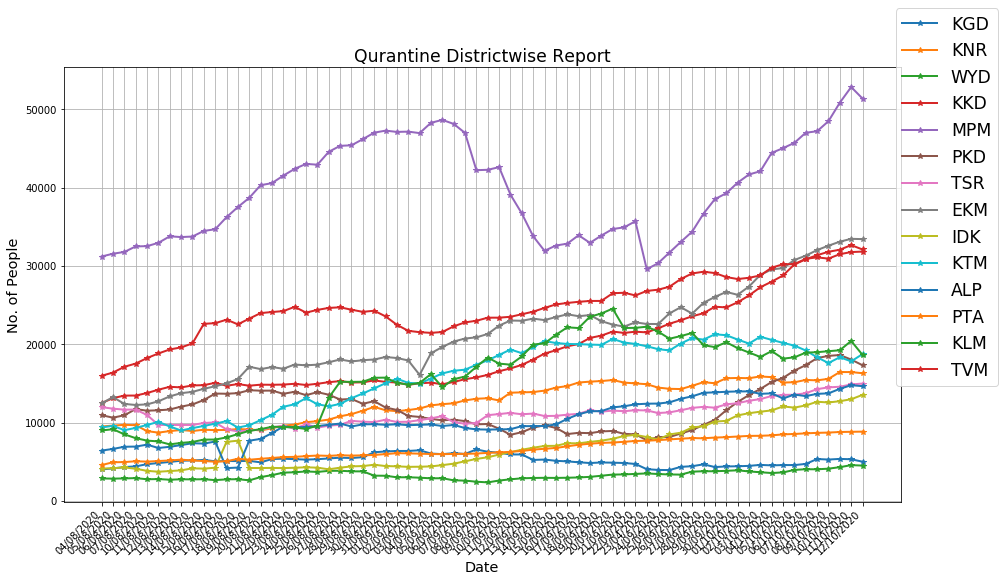

In [12]:
fig = plt.figure(figsize=(15,8))
plt.plot(total_quarantine['Date'],total_quarantine[['KGD', 'KNR', 'WYD', 'KKD', 'MPM', 'PKD', 'TSR', 'EKM', 'IDK','KTM', 'ALP', 'PTA', 'KLM', 'TVM']],'*-',linewidth=2)
plt.xticks(rotation = 45, ha='right')
plt.title('Qurantine Districtwise Report',fontsize='xx-large')
plt.xlabel('Date',fontsize='x-large')
plt.ylabel('No. of People',fontsize='x-large')
plt.figlegend(labels=('KGD', 'KNR', 'WYD', 'KKD', 'MPM', 'PKD', 'TSR', 'EKM', 'IDK','KTM', 'ALP', 'PTA', 'KLM', 'TVM'),fontsize='xx-large')
plt.grid(True)
fig.savefig('reports/quarantine/overall.png')

In [13]:
current_status = total_quarantine.tail(1)

In [14]:
lab = ['KGD', 'KNR', 'WYD', 'KKD', 'MPM', 'PKD', 'TSR', 'EKM', 'IDK','KTM', 'ALP', 'PTA', 'KLM', 'TVM']
val = []
for index,row in  current_status.iterrows():
    val_list = [row.KGD,row.KNR,row.WYD,row.KKD,row.MPM,row.PKD,row.TSR,row.EKM,row.IDK,row.KTM,row.ALP,row.PTA,row.KLM,row.TVM]
print(val_list)    

[5017, 16309, 4522, 32110, 51380, 17330, 14996, 33432, 13550, 18755, 14662, 8856, 18652, 31842]


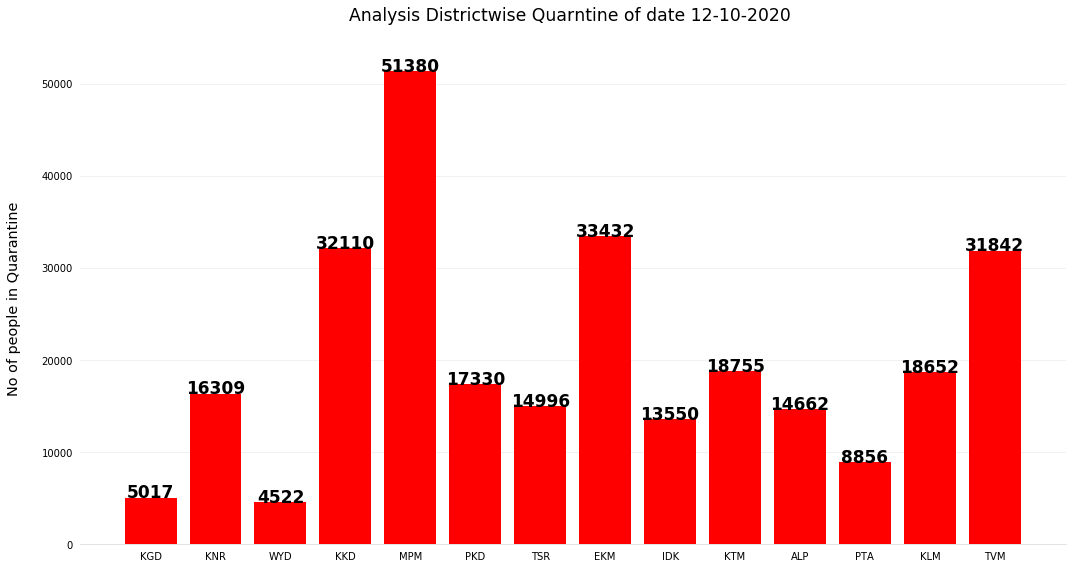

In [15]:
fig , ax = plt.subplots(figsize=(15,8))
bars = ax.bar(lab,val_list,color='red')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)
plt.title("Analysis Districtwise Quarntine of date {0} \n".format(date),fontsize='xx-large')
plt.ylabel('No of people in Quarantine \n',fontsize='x-large')
plt.xlabel('\n',fontsize='x-large')
# Grab the color of the bars so we can make the
# text the same color.
bar_color = bars[0].get_facecolor()

# Add text annotations to the top of the bars.
# Note, you'll have to adjust this slightly (the 0.3)
# with different data.
for bar in bars:
    ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 0.3,
      round(bar.get_height(), 1),
      horizontalalignment='center',
      color='black',
      fontsize=17,
      weight='bold'
  )

fig.tight_layout()
fig.savefig('reports/quarantine/current_status.png')

In [16]:
#comparing quaratine rate within 2 days
current_status = total_quarantine.tail(2)
val = []
for index,row in  current_status.iterrows():
    val_list = [row.KGD,row.KNR,row.WYD,row.KKD,row.MPM,row.PKD,row.TSR,row.EKM,row.IDK,row.KTM,row.ALP,row.PTA,row.KLM,row.TVM]
    val.append(val_list)
print(val) 


[[5330, 16460, 4577, 32666, 52847, 18055, 14876, 33470, 12989, 17828, 14782, 8835, 20430, 31779], [5017, 16309, 4522, 32110, 51380, 17330, 14996, 33432, 13550, 18755, 14662, 8856, 18652, 31842]]


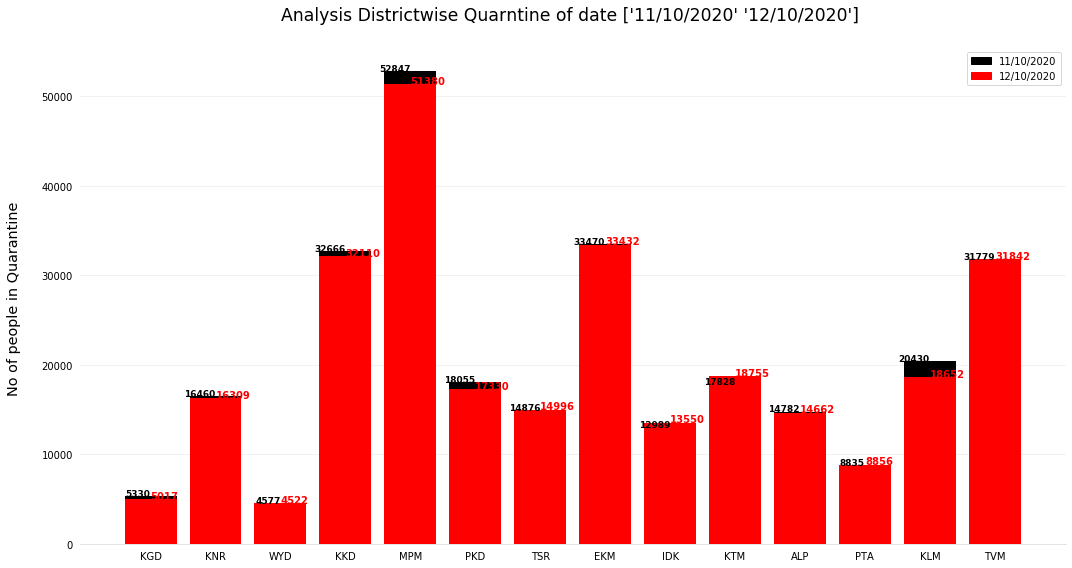

In [17]:
fig , ax = plt.subplots(figsize=(15,8))

bars1 = ax.bar(lab,val[0],color='black')
bars2 = ax.bar(lab,val[1],color='red')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)
plt.title("Analysis Districtwise Quarntine of date {0} \n".format(total_quarantine['Date'].tail(2).values),fontsize='xx-large')
plt.ylabel('No of people in Quarantine \n',fontsize='x-large')
plt.xlabel('\n',fontsize='x-large')
# Grab the color of the bars so we can make the
# text the same color.
bar_color = bars[0].get_facecolor()

# Add text annotations to the top of the bars.
# Note, you'll have to adjust this slightly (the 0.3)
# with different data.
for bar in bars1:
    ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 0.3,
      round(bar.get_height(), 1),
      horizontalalignment='right',
      color='black',
      fontsize=9,
      weight='bold'
  )
for bar in bars2:
    ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 0.3,
      round(bar.get_height(), 1),
      horizontalalignment='left',
      color='red',
      fontsize=10,
      weight='bold'
  )
yesterday = str(total_quarantine['Date'].tail(2).values).replace('[\'','').replace('\'','').split(' ')[0]
today = str(total_quarantine['Date'].tail(1).values).replace('[\'','').replace('\']','')
colors = {today:'red', yesterday:'black'}      
d1,d2 = total_quarantine['Date'].tail(2).values
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in [d1,d2]]
plt.legend(handles, [d1,d2])
fig.tight_layout()
fig.savefig('reports/quarantine/consistant2day.png')

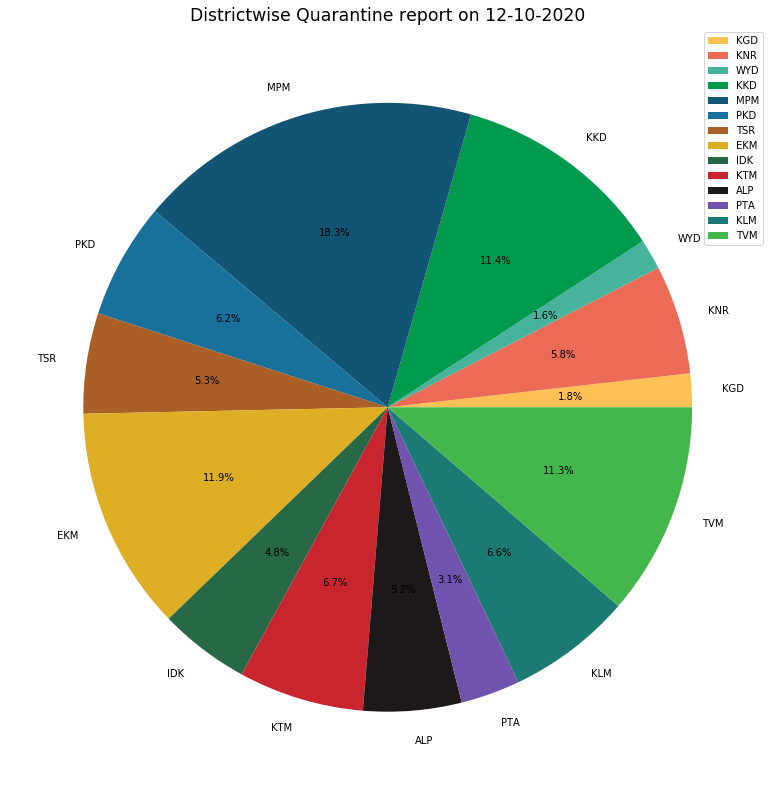

In [18]:
fig2 , ax = plt.subplots(figsize=(20,14))
labels = list(total_quarantine.columns[1:])
color1 = {1:'#FFC154',2:'#EC6B56',3:'#47B39C',4:'#009A4E',5:'#115473',6:'#17719B',7:'#AA5F27',8:'#DEAE24',9:'#276846',10:'#C9252E',11:'#1D181A',12:'#7252AF',13:'#1B7A74',14:'#43B74C'}
color = list(color1.values())
ax.pie(val_list,labels=labels,colors=color,autopct='%.1f%%')
ax.legend(labels,loc='upper right')
plt.title('Districtwise Quarantine report on {0}'.format(date),fontsize='xx-large')
fig2.savefig('reports/quarantine/districcontrib.png')